In [1]:
import numpy as np, curvedsky as cs, sys, plottools as pl, local, tools_cmb, tools_lens, quad_func, pickle, binning as bn
from pixell import enmap
from matplotlib.pyplot import *

/global/homes/t/toshiyan/Work/Lib/actlib/actsims/actsims/noise.py:9: UserWarning: No pyfftw found. Using much slower numpy fft engine.
  if 'fftw' not in pfft.engine: warnings.warn("No pyfftw found. Using much slower numpy fft engine.")


In [2]:
aobj = local.init_analysis_params(qid='diff_boss_03')
dirs = local.data_directory()
ocl = (np.loadtxt(local.init_analysis_params(qid='comb_dn').fscl['c'])).T[1]
lcl = aobj.lcl[0]
qobj = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'],bhe=['src'])
Qobj = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'])
al = (np.loadtxt(qobj.f['TT'].al)).T[1]

In [3]:
mb = bn.multipole_binning(20,lmin=50,lmax=2048)

In [4]:
Tlm = pickle.load(open(aobj.falm['c']['T'][0].replace('boss_03','boss_03_raw'),"rb"))
tlm = pickle.load(open(aobj.falm['c']['T'][1].replace('boss_03','boss_03_raw'),"rb"))

In [5]:
Klm0, Kl0 = local.quick_rec(Tlm,ocl,lcl,al)
klm0, kl0 = local.quick_rec(tlm,ocl,lcl,al)

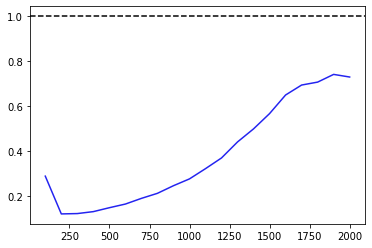

In [6]:
bK0 = bn.binning1(Kl0,mb)
bk0 = bn.binning1(kl0,mb)
plot(mb.bc,bk0/bK0)
axhline(1,color='k',ls='--')

/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you

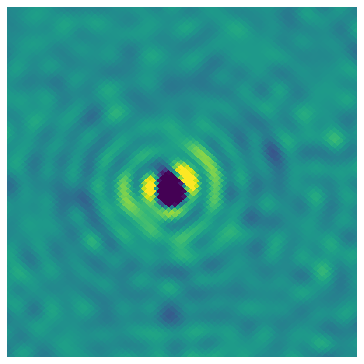

In [7]:
local.show_kmap(Klm0,lonra=[185,190],latra=[10,15],v=1)

In [8]:
mask_ptsr0 = tools_cmb.create_mask(2048,ascale=0)

In [9]:
Klm, Kl = local.quick_rec(Tlm,ocl,lcl,al,mask=mask_ptsr0)
klm, kl = local.quick_rec(tlm,ocl,lcl,al,mask=mask_ptsr0)

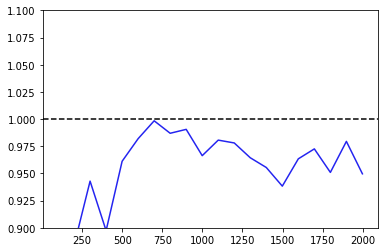

In [10]:
ylim(0.9,1.1)
bK = bn.binning1(Kl,mb)
bk = bn.binning1(kl,mb)
plot(mb.bc,bk/bK)
plot(mb.bc,bk0/bK0)
axhline(1,color='k',ls='--')

/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you

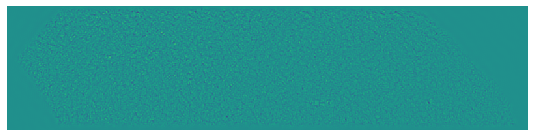

In [11]:
local.show_kmap(Klm,lonra=[148,245],latra=[-3,20],v=1)

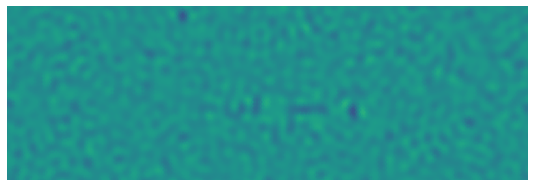

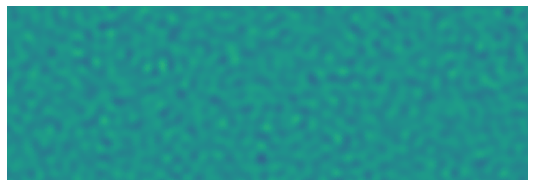

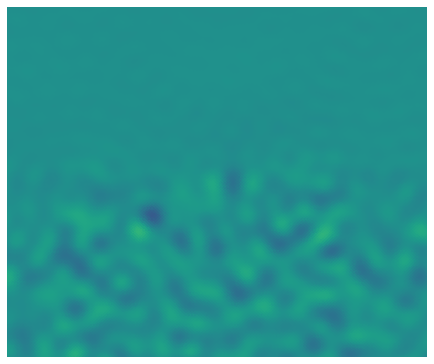

In [12]:
local.show_kmap(fname=Qobj.f['TT'].alm[0],lonra=[180,195],latra=[0,5],nside=2048,v=1)
local.show_kmap(fname=Qobj.f['TT'].alm[0],lonra=[180,195],latra=[10,15],nside=2048,v=1)
local.show_kmap(fname=Qobj.f['TT'].alm[0],lonra=[206,212],latra=[17,22],nside=2048,v=1)